# **Week 5 notebook**

### **Exercise 7.6:**

<img src="SymPyBilleder/2025-09-29-08-55-44.png" width="550">

In [25]:
# Recommended Packages:
library(CCP)
library(geigen)

In [26]:
# First we load everything:
Beef <- data.frame("pH" = c(1,rep(0,17)),
                "Water" = c(0.09,1,rep(0,16)),
                "Protein"  = c(0.28,-0.4,1,rep(0,15)),
                "EtherExt" = c(-0.28,-0.16,-0.56,1,rep(0,14)),
                "Hydroxy" = c(-0.33,-0.08,-0.55,0.59,1,rep(0,13)),
                "CollaSol" = c(-0.08,-0.01,-0.03,0.05,0.16,1,rep(0,12)),
                "Lightn" = c(-0.02,0.03,0.34,-0.31,-0.48,-0.02,1,rep(0,11)),
                "Hue" = c(-0.33,-0.23,-0.47,0.4,0.62,-0.03,-0.21,1,rep(0,10)),
                "DripLoss" = c(0.01,0.18,-0.07,0.08,-0.12,-0.1,0.25,-0.13,1,rep(0,9)),
                "CookLoss" = c(-0.38,0.15,-0.64,0.44,0.66,-0.01,-0.45,0.65,0.03,1,rep(0,8)),
                "WBshear" = c(-0.26,-0.01,-0.63,0.42,0.72,-0.03,-0.55,0.67,-0.11,0.73,1,rep(0,7)),
                "Appear" = c(0.1,-0.003,0.25,-0.42,-0.33,-0.19,0.35,0.07,0.02,-0.18,-0.28,1,rep(0,6)),
                "EaseSink" = c(0.17,-0.16,0.27,-0.11,-0.26,0.01,0.19,-0.19,-0.02,-0.36,-0.38,0.24,1,rep(0,5)),
                "Friabil" = c(0.1,-0.17,0.2,-0.09,-0.22,0.06,0.19,-0.1,-0.03,-0.31,-0.32,0.27,0.93,1,rep(0,4)),
                "Residue"  = c(0.08,-0.19,0.23,-0.13,-0.24,-0.02,0.2,-0.1,-0.02,-0.32,-0.33,0.33,0.91,0.94,1,rep(0,3)),
                "InJuice" = c(0.08,-0.08,0.03,-0.004,-0.05,0.05,-0.06,-0.03,-0.13,-0.12,-0.1,0.16,0.69,0.72,0.72,1,rep(0,2)),
                "SusJuice" = c(0.01,-0.09,-0.004,-0.01,-0.02,0.03,-0.02,0.08,-0.15,-0.07,-0.03,0.24,0.66,0.7,0.7,0.93,1,rep(0,1)),
                "OvAcc" = c(0.13,-0.13,0.21,-0.09,-0.22,0.07,0.22,-0.14,-0.01,-0.34,-0.37,0.31,0.92,0.92,0.91,0.8,0.79,1)
)
Beef = Beef + t(Beef) - diag(1,18,18)

##### **Canonical Correlation Analysis on Beef Characterization**

We consider the data from Exercise 7.3 and do now want to analyze the relation between the panel assessments and the physical/chemical measurements on the meat by means of Canonical Correlation Analyses of the data. A sample program for this is:

In [28]:
Exx = as.matrix(Beef[1:11,1:11])
Eyx = as.matrix(Beef[12:18,1:11])
Exy = as.matrix(Beef[1:11,12:18])
Eyy = as.matrix(Beef[12:18,12:18])
invExx = solve(Exx)
invEyy = solve(Eyy)

#Calculating the Canonical correlations:
Cancorr = geigen(Eyx%*%invExx%*%Exy,Eyy,symmetric = TRUE)
values = sort(Cancorr$values,decreasing = TRUE)

# E is the residual variation after having predicted Y by means of X
H = Eyx%*%invExx%*%Exy
E = Eyy - Eyx%*%invExx%*%Exy
invE = solve(E)
Ev <- eigen(invE%*%H)
var = Ev$values

# Eigenvalues, Proportion and Cumulative proportion of Variance:
varPC <- var/sum(var)
cumu = c(1:7)
for (i in 1:7){
  cumu[i] = sum(varPC[1:i])
}
results <- data.frame("CanCor" = sqrt(values),"Squared CanCor" = values,"eigenvalues"=var,"proportion"=varPC,
                      "cumulative" = cumu)
print("Table with information about the Canonical Correlations:")
results

[1] "Table with information about the Canonical Correlations:"


CanCor,Squared.CanCor,eigenvalues,proportion,cumulative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.6720912,0.45170663,0.82384114,0.447388814,0.4473888
0.6148370,0.37802455,0.60778051,0.330056594,0.7774454
0.4036625,0.16294345,0.19466241,0.105711869,0.8831573
0.2987878,0.08927414,0.09802526,0.053232840,0.9363901
0.2636168,0.06949381,0.07468388,0.040557253,0.9769474
0.1637651,0.02681901,0.02755809,0.014965481,0.9919129
0.1211342,0.01467351,0.01489202,0.008087147,1.0000000


In [30]:
## Calculating p-values using F-approximations with Wilks test:
n = 79
p = length(Exx[,1])
q = length(Eyy[,1])

HypTest <- p.asym(results$CanCor,n,p,q,tstat="Wilks")

results_all <- data.frame(results,HypTest)
print("Table with information about the Canonical Correlations similar to the output in SAS:")
results_all

Wilks' Lambda, using F-approximation (Rao's F):
              stat    approx df1      df2    p.value
1 to 7:  0.2319646 1.3375749  77 372.9807 0.04166877
2 to 7:  0.4230666 0.9810705  60 329.8928 0.51995711
3 to 7:  0.6801983 0.5696448  45 284.9171 0.98797220
4 to 7:  0.8126073 0.4297982  32 237.6155 0.99724136
5 to 7:  0.8922633 0.3609966  21 187.1950 0.99592163
6 to 7:  0.9589010 0.2332596  12 132.0000 0.99637196
7 to 7:  0.9853265 0.1995531   5  67.0000 0.96156219
[1] "Table with information about the Canonical Correlations similar to the output in SAS:"


CanCor,Squared.CanCor,eigenvalues,proportion,cumulative,id,stat,approx,df1,df2,p.value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.6720912,0.45170663,0.82384114,0.447388814,0.4473888,Wilks,0.2319646,1.3375749,77,372.9807,0.04166877
0.6148370,0.37802455,0.60778051,0.330056594,0.7774454,Wilks,0.4230666,0.9810705,60,329.8928,0.51995711
0.4036625,0.16294345,0.19466241,0.105711869,0.8831573,Wilks,0.6801983,0.5696448,45,284.9171,0.98797220
0.2987878,0.08927414,0.09802526,0.053232840,0.9363901,Wilks,0.8126073,0.4297982,32,237.6155,0.99724136
0.2636168,0.06949381,0.07468388,0.040557253,0.9769474,Wilks,0.8922633,0.3609966,21,187.1950,0.99592163
0.1637651,0.02681901,0.02755809,0.014965481,0.9919129,Wilks,0.9589010,0.2332596,12,132.0000,0.99637196
0.1211342,0.01467351,0.01489202,0.008087147,1.0000000,Wilks,0.9853265,0.1995531,5,67.0000,0.96156219


<img src="SymPyBilleder/2025-09-29-08-56-07.png" width="550">

##### **1.**

There is only one that is significantly different from $0$ as we see from the "Wilks' Lambda, using F-approcimation" table, where there is only one value $0.0412 <0.05$.

##### **2.**

We have to look at the table titled "Table with information about the Canonical Correlations"? Where we can see the first two canonical variables correlations and much more. Here is a snippet of the table:

CanCor	Squared.CanCor	eigenvalues	proportion	cumulative

0.6720912	0.45170663	0.82384114	0.447388814	0.4473888

0.6148370	0.37802455	0.60778051	0.330056594	0.7774454

Here, we see how the first two canonical variables explain $77.7\%$ of the variance, which is quite a lot. and the coefficients are $0.672$ and $0.615$ respectively, which means that they are strong for describing the physical/chemical measurements and the panel assessments? Plus that there exists correlation between the two sets of variables.

##### **3.**

No plots are visible...

##### **4.**

No plots are visible...

# **Slide E in R code**

In [1]:
# Slide 11:

heptathlon<-read.csv2("../data/heptathlon.csv")

heptathlon2<-heptathlon[,-(1:2)]

In [2]:
# Slide 13:

library(psych)

# Correlation matrix
R<-cor(heptathlon2)

# squared multiple correlation coefficients

smc<-numeric(7)
for(i in 1:7){
  smc[i]<- R[i,-i]%*%solve(R[-i,-i])%*%R[-i,i]
  }
smc

# Construction of V matrix
V<-R
diag(V)<-smc

Warning message:
“package ‘psych’ was built under R version 4.3.3”


[1] 0.9108174 0.8140824 0.6881388 0.8192189 0.9151310 0.4128242 0.6152957

In [3]:
# Slide 14:
principal(cor(heptathlon2),nfactors = 3,rotate = "none")$loadings[,]

principal(V,nfactors = 3,rotate = "none")$loadings[,]

,PC1,PC2,PC3
Hurdles,-0.9527330,0.18394262,0.02701241
High.Jump,0.7998971,-0.25979027,-0.29669430
Shot,0.7550672,0.36064144,0.45730099
Run200,-0.8516293,-0.24433641,-0.09159858
Longjump,0.9626588,-0.05003306,0.10251349
Javelin,0.1500479,0.91996733,-0.35422467
Run800,-0.7904642,0.23683966,0.26032215


Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”


,PC1,PC2,PC3
Hurdles,-0.9959647,0.24495436,0.037990372
High.Jump,0.8579436,-0.31007568,0.423588642
Shot,0.8734063,0.40661231,-0.003678345
Run200,-0.9309107,-0.28694991,0.241219073
Longjump,1.0075876,-0.07838114,0.006429187
Javelin,0.2358304,0.95223816,0.158935316
Run800,-0.9339401,0.27609909,0.151799610


In [4]:
# Slide 15:

eigen(V)$vectors[,1:3]%*%diag(sqrt(eigen(V)$values[1:3]))

principal(V,nfactors = 3,rotate = "none")$loadings[,]

0.9545446,-0.18912611,0.05947206
-0.7848444,0.31255696,0.32566158
-0.7164747,-0.36680153,0.07108174
0.8339174,0.29750117,0.20663545
-0.9651381,0.02517499,0.02657049
-0.1302156,-0.59494431,0.16000578
0.7384005,-0.18720366,0.16781646


Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”


,PC1,PC2,PC3
Hurdles,-0.9959647,0.24495436,0.037990372
High.Jump,0.8579436,-0.31007568,0.423588642
Shot,0.8734063,0.40661231,-0.003678345
Run200,-0.9309107,-0.28694991,0.241219073
Longjump,1.0075876,-0.07838114,0.006429187
Javelin,0.2358304,0.95223816,0.158935316
Run800,-0.9339401,0.27609909,0.151799610


In [5]:
# Slide 16:

eigen(R)$vectors[,1:3]%*%diag(sqrt(eigen(R)$values[1:3]))

principal(R,nfactors = 3,rotate = "none")$loadings[,]

0.9527330,-0.18394262,0.02701241
-0.7998971,0.25979027,-0.29669430
-0.7550672,-0.36064144,0.45730099
0.8516293,0.24433641,-0.09159858
-0.9626588,0.05003306,0.10251349
-0.1500479,-0.91996733,-0.35422467
0.7904642,-0.23683966,0.26032215


,PC1,PC2,PC3
Hurdles,-0.9527330,0.18394262,0.02701241
High.Jump,0.7998971,-0.25979027,-0.29669430
Shot,0.7550672,0.36064144,0.45730099
Run200,-0.8516293,-0.24433641,-0.09159858
Longjump,0.9626588,-0.05003306,0.10251349
Javelin,0.1500479,0.91996733,-0.35422467
Run800,-0.7904642,0.23683966,0.26032215


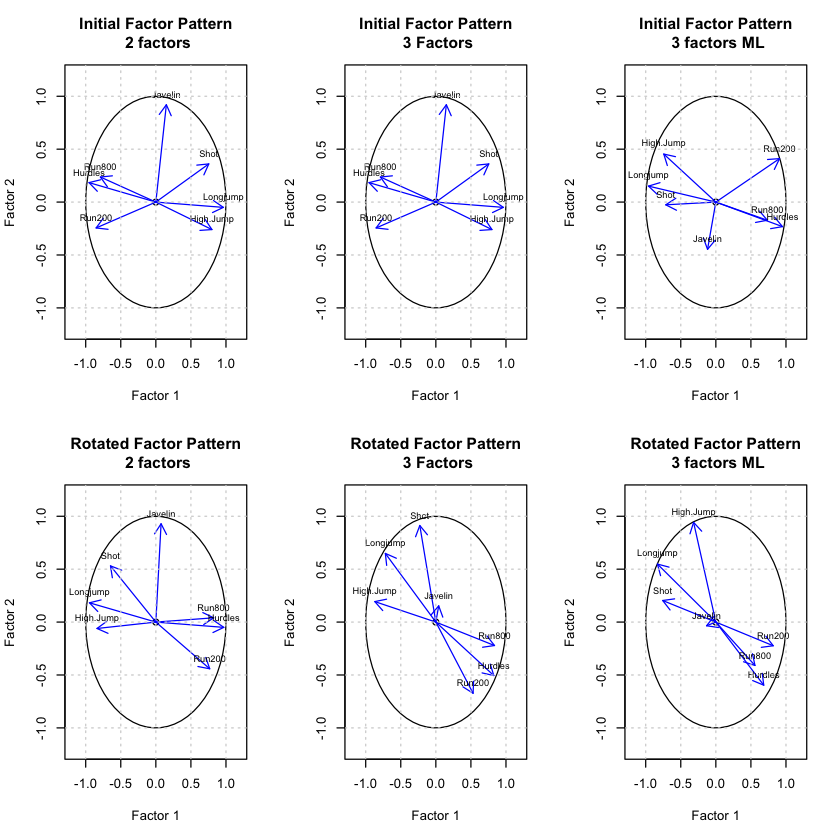

In [6]:
# Slide 17:

fa3 <- principal(R,nfactors = 3,rotate = "none") 
fa31 <- fa3$loadings[,1:3] 

fa2 <- principal(R,nfactors = 2,rotate = "none") 
fa21 <- fa2$loadings[,1:2] 

fa3ml<-fa(R,nfactors = 3,rotate = "none",scores="regression",fm="ml")
fa3ml.1<-fa3ml$loadings[,1:3]

# rotating:

fa3rot <- principal(R,nfactors = 3,rotate = "varimax") 
fa3rot1 <- fa3rot$loadings[,1:3] 

fa2rot <- principal(R,nfactors = 2,rotate = "varimax") 
fa2rot1 <- fa2rot$loadings[,1:2] 

fa3mlrot<-fa(R,nfactors = 3,rotate = "varimax",
             scores="regression",fm="ml")

fa4mlrot<-fa(R,nfactors = 4,rotate = "varimax",
             scores="regression",fm="ml")

fa3mlrot.1<-fa4mlrot$loadings[,1:3]

# plot factor structure:

circle = seq(-3.2,3.2,by=0.1) 
# Different combinations of plots 
Names = names(heptathlon2)
plotdata1<-list(fa21,fa31,fa3ml.1)
plotdata2<-list(fa2rot1,fa3rot1,fa3mlrot.1)
my.type<-c("2 factors","3 Factors","3 factors ML")
par(mfrow=c(2,3))
for (i in 1:3){ 
  x<-plotdata1[[i]]
	#Plot for the Factors 
	plot(0,0,xlim = c(-1.2,1.2),ylim = c(-1.2,1.2),xlab = paste0("Factor ",1), 
           ylab = paste0("Factor ",2),
      main = paste("Initial Factor Pattern\n",my.type[i])) 
	points(1*cos(circle),1*sin(circle),type='l') 	
      arrows(c(rep(0,7)),c(rep(0,7)),x[,1],x[,2],length = 0.1,col="blue") 	
      text(x[,1],x[,2]+0.1,Names,cex = 0.7) 
	grid() 
  }
for (i in 1:3){ 
  y<-plotdata2[[i]]

	#Plot for the Factors 
	plot(0,0,xlim = c(-1.2,1.2),ylim = c(-1.2,1.2),xlab = paste0("Factor ",1), 
           ylab = paste0("Factor ",2),
      main = paste("Rotated Factor Pattern\n",my.type[i])) 
	points(1*cos(circle),1*sin(circle),type='l') 	
      arrows(c(rep(0,7)),c(rep(0,7)),y[,1],y[,2],length = 0.1,col="blue") 	
      text(y[,1],y[,2]+0.1,Names,cex = 0.7) 
	grid() 
  }
par(mfrow=c(1,1))

In [7]:
# Slide 20:

temp<- fa(R,nfactors = 3,rotate = "varimax",smc=T,n.obs=25,  
          scores="regression",fm="ml")

A<-temp$loadings[,]
n<-25
k<-7
m<-3

my.Z<-(n-1-(2*k+5)/6-2*m/3)*log(det(A%*%t(A)+diag(temp$uniquenesses))/
                                det(R))
my.Z

1-pchisq(my.Z,df=((k-m)^2-k-m)/2)

[1] 7.900366

[1] 0.04811636

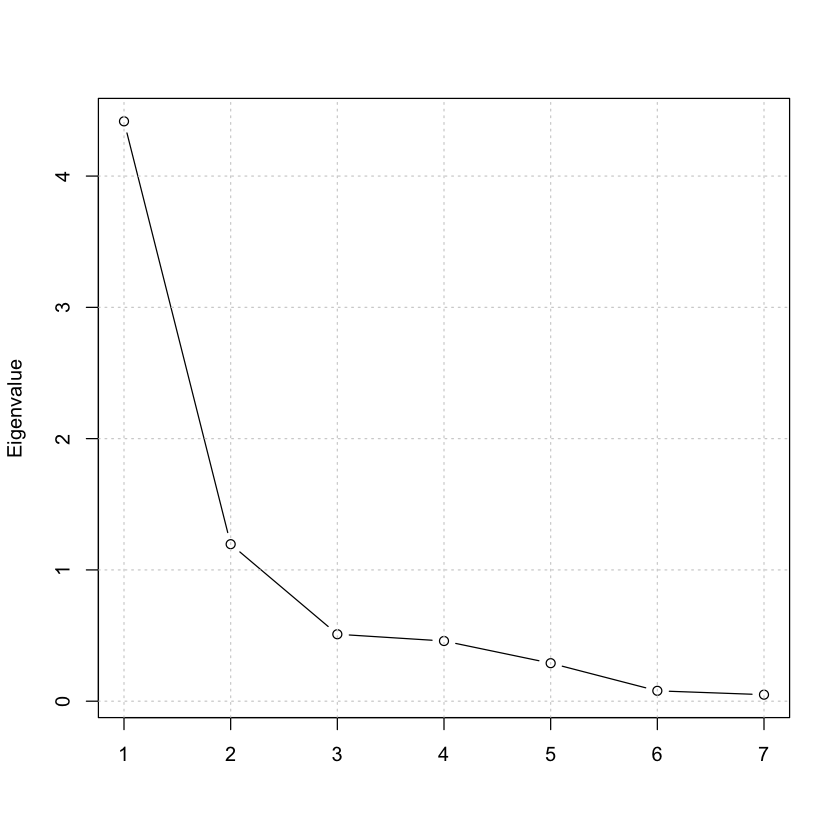

In [8]:
# Slide 22:

plot(eigen(R)$values,xlab='',ylab='Eigenvalue',type="b")
grid()

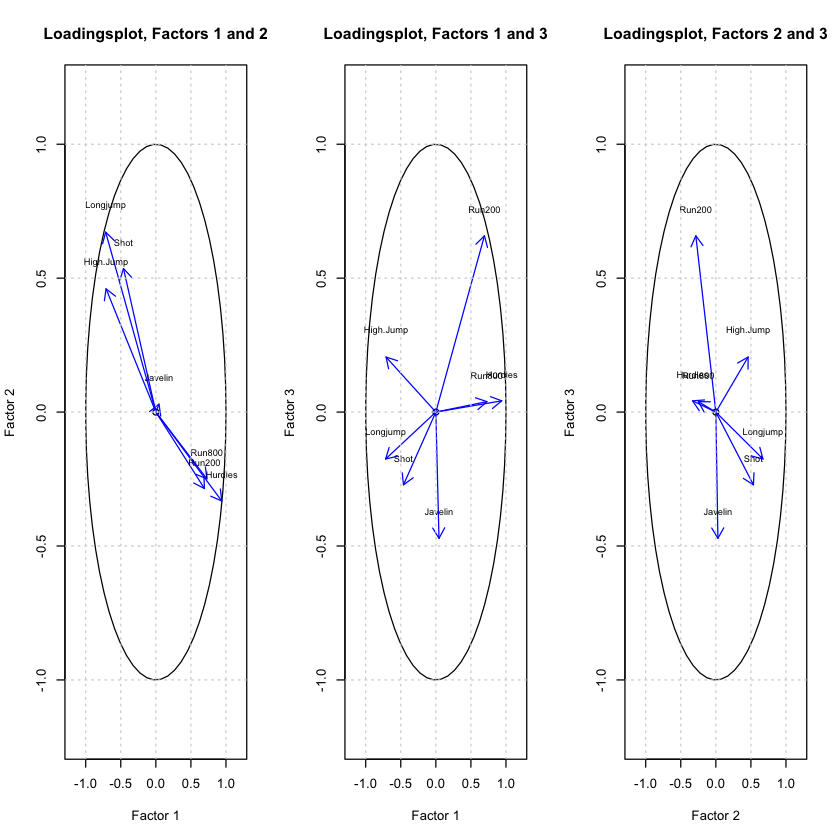

In [9]:
# Slide 23:

par(mfrow=c(1,3))

  x<-temp$loadings[,]
	#Plot for the Factors 
	plot(0,0,xlim = c(-1.2,1.2),ylim = c(-1.2,1.2),xlab = paste0("Factor ",1), 
           ylab = paste0("Factor ",2),
      main = paste("Loadingsplot, Factors 1 and 2")) 
	points(1*cos(circle),1*sin(circle),type='l') 	
      arrows(c(rep(0,7)),c(rep(0,7)),x[,1],x[,2],length = 0.1,col="blue") 	
      text(x[,1],x[,2]+0.1,Names,cex = 0.7) 
	grid() 
	plot(0,0,xlim = c(-1.2,1.2),ylim = c(-1.2,1.2),xlab = paste0("Factor ",1), 
           ylab = paste0("Factor ",3),
      main = paste("Loadingsplot, Factors 1 and 3")) 
	points(1*cos(circle),1*sin(circle),type='l') 	
      arrows(c(rep(0,7)),c(rep(0,7)),x[,1],x[,3],length = 0.1,col="blue") 	
      text(x[,1],x[,3]+0.1,Names,cex = 0.7) 
	grid() 
	plot(0,0,xlim = c(-1.2,1.2),ylim = c(-1.2,1.2),xlab = paste0("Factor ",2), 
           ylab = paste0("Factor ",3),
      main = paste("Loadingsplot, Factors 2 and 3")) 
	points(1*cos(circle),1*sin(circle),type='l') 	
      arrows(c(rep(0,7)),c(rep(0,7)),x[,2],x[,3],length = 0.1,col="blue") 	
      text(x[,2],x[,3]+0.1,Names,cex = 0.7) 
	grid() 
par(mfrow=c(1,1))

In [10]:
# Slide 26:

data.frame(Name=heptathlon[,1],  scale(heptathlon2)[,]%*%solve(R)%*%A)

Name,ML1,ML3,ML2
<chr>,<dbl>,<dbl>,<dbl>
"Joyner_Kersee,(USA)",-0.8051687,2.2694725,-1.44028787
"John,(GDR)",-1.2491403,0.4329102,-0.08238012
"Behmer,(GDR)",-0.6699509,0.5876323,-1.44924673
"Choubenkova,(URS)",-0.4789514,-0.1335285,-0.69458387
"Sablovskaite,(URS)",-0.3933279,-0.2766225,-0.83698712
"Schulz,(GDR)",0.0998068,0.7339487,0.20996216
"Fleming,(AUS)",-0.7421209,-0.3391833,-1.00248387
"Greiner,(USA)",-0.0899822,0.9712517,0.24420982
"Lajbnerova,(CZE)",-0.4603487,-0.4069532,0.62882274


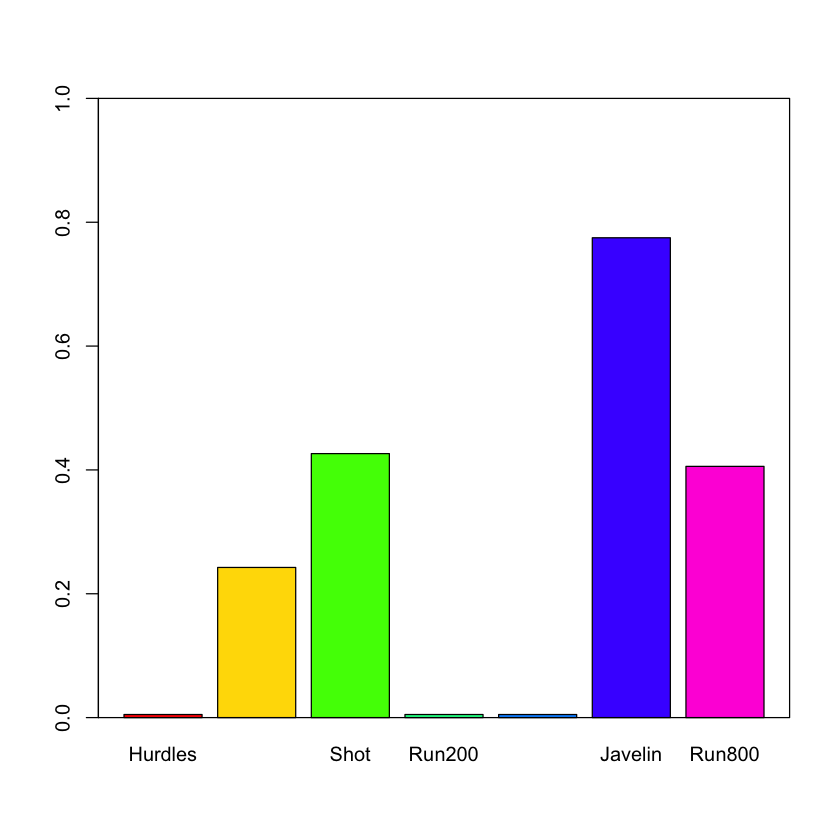

In [11]:
# Slide 27:

barplot(temp$uniquenesses,col=rainbow(7),ylim=c(0,1))
box()

In [12]:
# Slide 43:

frets<-read.csv2("../data/frets.csv")
head(frets)

,l1,b1,l2,b2
,<int>,<int>,<int>,<int>
1,191,155,179,145
2,195,149,201,152
3,181,148,185,149
4,183,153,188,149
5,176,144,171,142
6,208,157,192,152


In [13]:
# Slide 44
frets2<-scale(frets,center=T,scale=T)
round(cov(frets2),digits=2)

,l1,b1,l2,b2
l1,1.00,0.73,0.71,0.70
b1,0.73,1.00,0.69,0.71
l2,0.71,0.69,1.00,0.84
b2,0.70,0.71,0.84,1.00


,l2,b2
l1,0.71,0.70
b1,0.69,0.71


Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”

Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



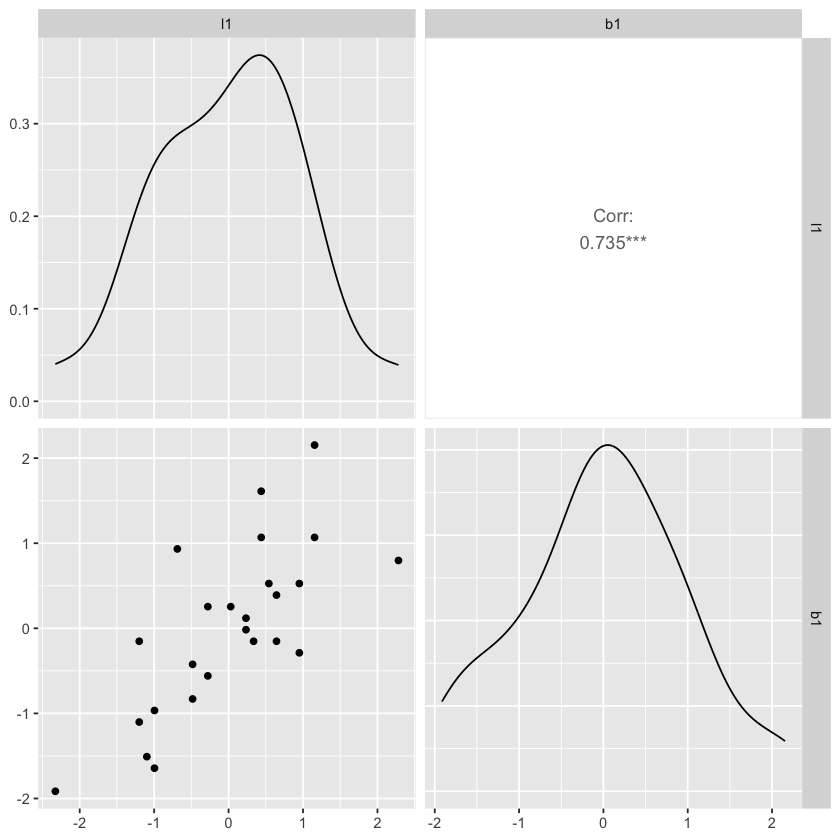

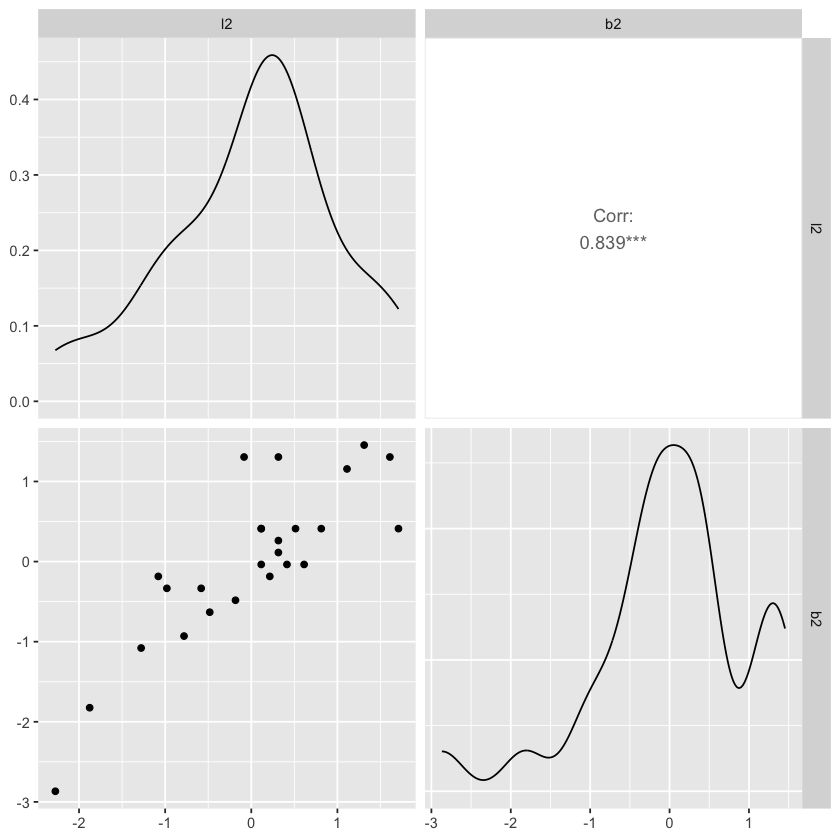

In [14]:
# Slide 45:
brother1<-frets2[,1:2]
brother2<-frets2[,3:4]

round(cov(brother1,brother2),digits=2)

library(GGally)

ggpairs(brother1)
ggpairs(brother2)

In [17]:
# Slide 46:
library(CCA)
my.cca<-cc(brother1,brother2)

# The A matrix:
(A<-my.cca$xcoef)


# The B matrix:
(B<-my.cca$ycoef)

# canonincal correlations:

my.cca$cor

# note:
round(t(A)%*%cor(brother1)%*%A,digits=2)

round(t(B)%*%cor(brother2)%*%B,digits=2)

Loading required package: fda

Warning message:
“package ‘fda’ was built under R version 4.3.3”
Loading required package: splines

Loading required package: fds

Loading required package: rainbow

Loading required package: MASS

Loading required package: pcaPP

Warning message:
“package ‘pcaPP’ was built under R version 4.3.3”
Loading required package: RCurl

Warning message:
“package ‘RCurl’ was built under R version 4.3.3”
Loading required package: deSolve

Warning message:
“package ‘deSolve’ was built under R version 4.3.3”

Attaching package: ‘fda’


The following object is masked from ‘package:graphics’:

    matplot


Loading required package: fields

Warning message:
“package ‘fields’ was built under R version 4.3.3”
Loading required package: spam

Warning message:
“package ‘spam’ was built under R version 4.3.3”
Spam version 2.11-1 (2025-01-20) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is

l1,-0.5521896,-1.366374
b1,-0.5215372,1.378365


l2,-0.5044484,-1.768570
b2,-0.5382877,1.758566


[1] 0.7885079 0.0537397

1,0
0,1


1,0
0,1


-0.57312842,-0.01368291
-0.37497221,-1.69526490
0.48769136,0.07738080
0.02087481,0.73218662


0.58331715,-0.2586783
-1.08357681,-2.2993480
-0.03902804,-0.2672317
-0.18975583,-0.7956755


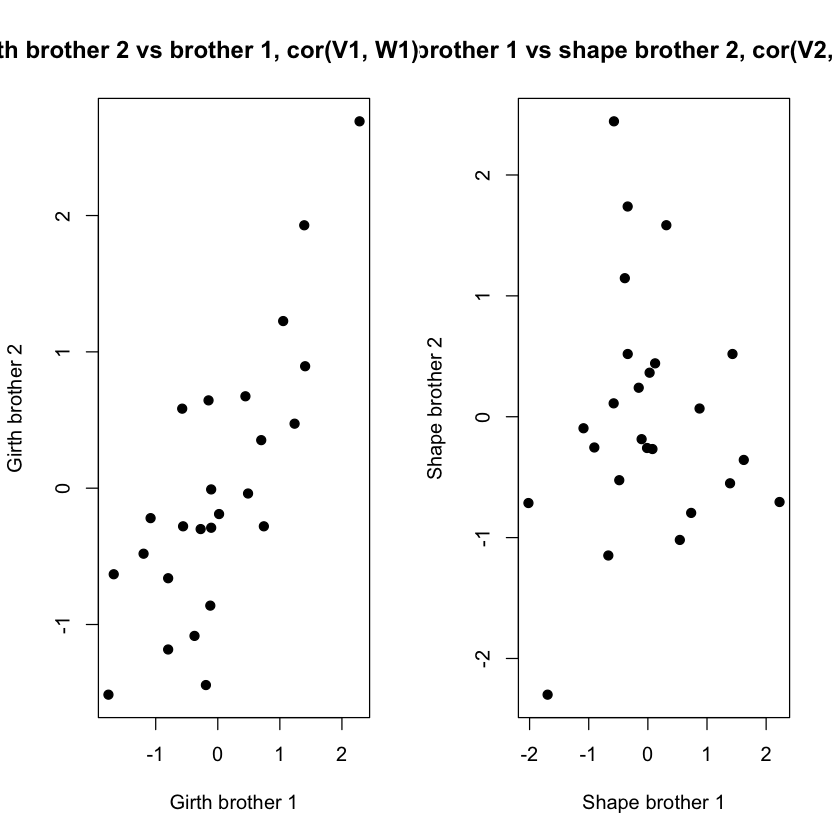

In [18]:
# Slide 47:

# Canonical variables values for each observation.
my.cca$scores$xscores[1:4,]   #V_1, V_2
my.cca$scores$yscores[1:4,]   #W_1, W_2

par(mfrow=c(1,2))

plot(my.cca$scores$xscores[,1], my.cca$scores$yscores[,1],pch=19,
     main="Girth brother 2 vs brother 1, cor(V1, W1)=0.7885",
     xlab='Girth brother 1',ylab='Girth brother 2')
plot(my.cca$scores$xscores[,2], my.cca$scores$yscores[,2], pch=19,
     main="Shape brother 1 vs shape brother 2, cor(V2, W2)=0.0537",
     xlab='Shape brother 1',ylab='Shape brother 2')
par(mfrow=c(1,1))

In [19]:
# Slide 48:

#Correlation between variables:

my.cca$scores$corr.X.xscores  #(l1, b1) (V_1, V_2)
my.cca$scores$corr.X.yscores  #(l1, b1) (W_1, W_2)

my.cca$scores$corr.Y.xscores  #(l2, b2) (V_1, V_2)
my.cca$scores$corr.Y.yscores  #(l2, b2) (W_1, W_2)

# note:
cor(brother2)%*%B

l1,-0.9352877,-0.3538884
b1,-0.9271512,0.3746875


l1,-0.7374817,-0.01901786
b1,-0.7310660,0.02013559


l2,-0.7539771,-0.01572908
b2,-0.7582663,0.01474027


l2,-0.9562074,-0.2926900
b2,-0.9616470,0.2742901


l2,-0.9562074,-0.2926900
b2,-0.9616470,0.2742901


In [20]:
# Slide 49:


#Test of hypothesis for the canonical dimensions
# rho: canonical correlations

(rho<-my.cca$cor)

(n<-dim(frets2)[1])    # number of observations
(p<-dim(brother1)[2]) # number of variables in the first set of variables
(q<-dim(brother2)[2]) ## number of variables in the second set of variables

#Compute p-values using the F-approximations
# for different test statistics.
?p.asym
(HypTest<-p.asym(rho,n,p,q, tstat="Wilks"))

# Standardization of brother1's canonical coefficients
# is not necessary, since we work with correlations 

####------
#  Notice that eigen(invE%*%H) are equal to rho^2/(1-rho^2)
# (see proof of Theorem 6.16 on p 390 of the book)
(aux<-(rho^2/(1-rho^2))) 
(VarPerc<- aux/sum(aux))
(VarCum<- cumsum(VarPerc))

#------------

Results <- data.frame("CanCor" = rho,
                      "Squared CanCor" = rho^2,
                      "eigenvaluesInvEH"=aux,
                      "proportion"=VarPerc, 
                      "cumulative" = VarCum,
                      HypTest)

Results

[1] 0.7885079 0.0537397

[1] 25

[1] 2

[1] 2

ERROR: Error in p.asym(rho, n, p, q, tstat = "Wilks"): could not find function "p.asym"
